<a href="https://colab.research.google.com/github/dojian/classML/blob/main/Chest_X_ray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# standard
import pandas as pd
import numpy as np
import random
import os

# tf and keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import models
from keras import layers

# plots
import seaborn as sns
import matplotlib.pyplot as plt

random.seed(2)
%matplotlib inline

In [4]:
csv_data = pd.read_csv("xray_chest.csv")
csv_data.head()

,dcm,jpg,type
0,/abscess/0.dcm,/abscess/0.jpg,abscess
1,/abscess/1.dcm,/abscess/1.jpg,abscess
2,/abscess/2.dcm,/abscess/2.jpg,abscess
3,/abscess/3.dcm,/abscess/3.jpg,abscess
4,/abscess/4.dcm,/abscess/4.jpg,abscess


In [5]:
csv_data.describe()

,dcm,jpg,type
count,97,97,97
unique,97,97,17
top,/abscess/0.dcm,/abscess/0.jpg,abscess
freq,1,1,9


In [6]:
csv_data.shape

(97, 3)

In [13]:
# checking the 17 diseases name based on each folder name
files_dir = "/content/drive/MyDrive/Rent/chest-xray-17-diseases/files"
disease = []
for i,k in enumerate(os.listdir(files_dir)):
    disease.append(k)
    print(i+1,k)

1 fracture
2 atelectasis
3 post_traumatic_ribs_deformation
4 abscess
5 pneumosclerosis
6 cardiomegaly
7 tuberculosis
8 sarcoidosis
9 atherosclerosis_of_the_aorta
10 ards
11 emphysema
12 scoliosis
13 pneumonia
14 hydropneumothorax
15 hydrothorax
16 post_inflammatory_changes
17 venous_congestion


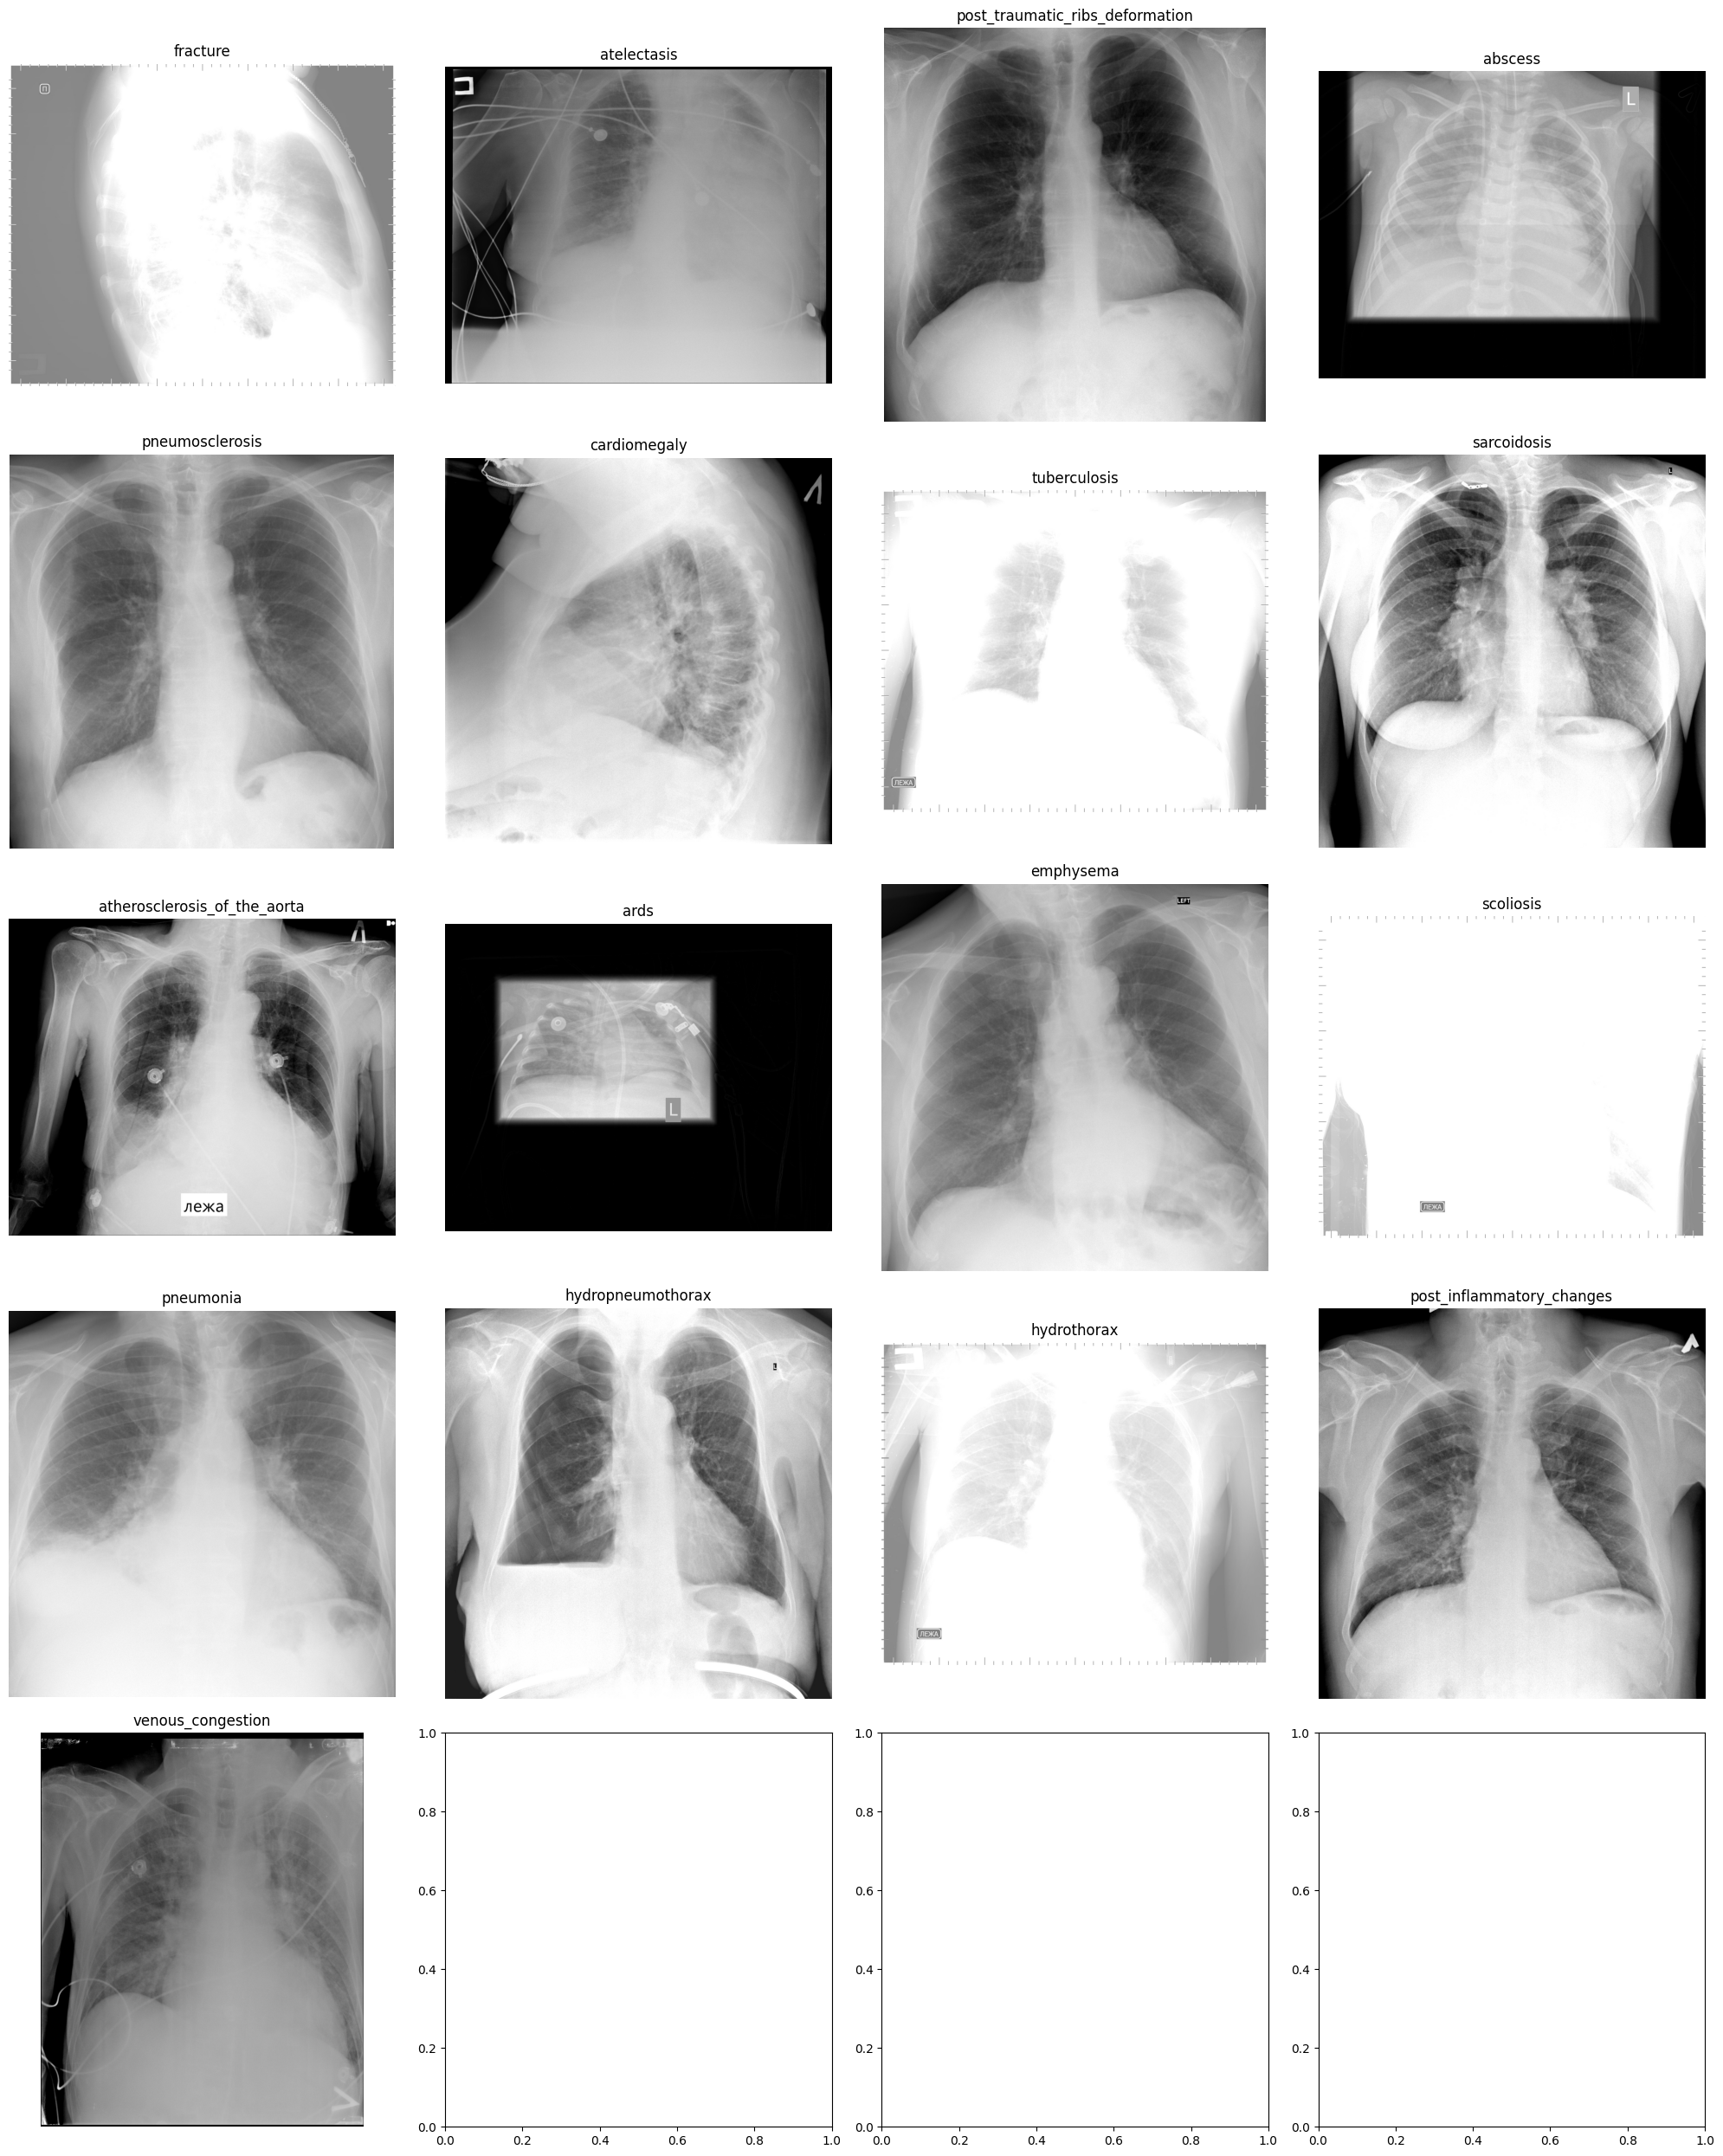

In [16]:
# read image
# Base path for the image folders
BASE_PATH = '/content/drive/MyDrive/Rent/chest-xray-17-diseases/files/'

# List of disease folder names
diseases = [
    'fracture', 'atelectasis', 'post_traumatic_ribs_deformation', 'abscess',
    'pneumosclerosis', 'cardiomegaly', 'tuberculosis', 'sarcoidosis',
    'atherosclerosis_of_the_aorta', 'ards', 'emphysema', 'scoliosis',
    'pneumonia', 'hydropneumothorax', 'hydrothorax', 'post_inflammatory_changes',
    'venous_congestion'
]

# To store the loaded images for each disease
images = {disease: [] for disease in diseases}

# Load all images into the images dictionary
for disease in diseases:
    disease_path = os.path.join(BASE_PATH, disease)
    if os.path.exists(disease_path):
        for img_file in os.listdir(disease_path):
            if img_file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):  # Check if the file is an image
                img_path = os.path.join(disease_path, img_file)
                try:
                    img = load_img(img_path)
                    images[disease].append(img)
                except UnidentifiedImageError:
                    print(f"Cannot identify image file: {img_path}")

# Displaying one image per disease
nrows, ncols = 5, 4  # Adjust as per the number of diseases
f, axs = plt.subplots(nrows, ncols, figsize=(20, 25))
for i, disease in enumerate(diseases):
    row, col = divmod(i, ncols)
    if images[disease]:
        axs[row, col].imshow(images[disease][0])  # Display the first image of each disease
        axs[row, col].set_title(disease)
    axs[row, col].axis('off')  # Turn off axis
plt.tight_layout()
plt.show()

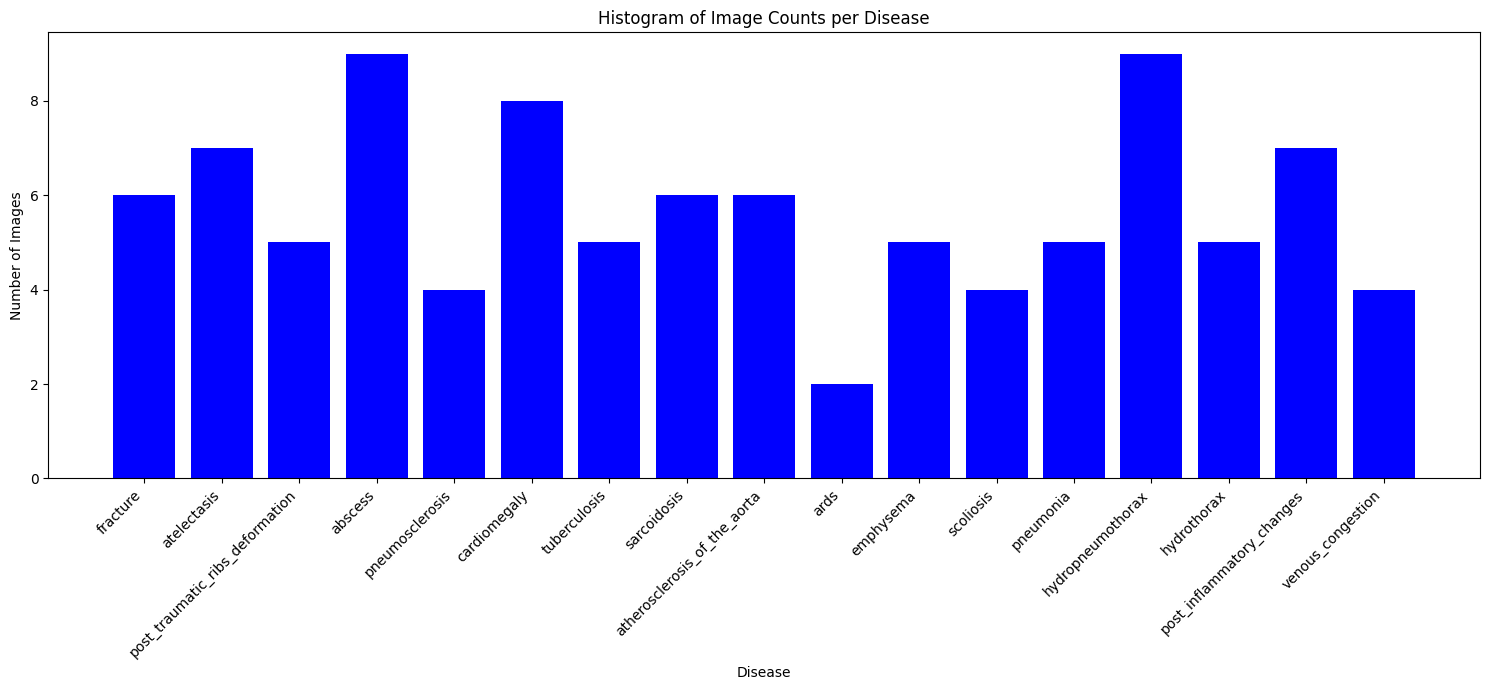

In [18]:
# Get a histogram that counts the number of images for each disease
#Assuming 'images' is a dictionary with diseases as keys and lists of images as values
disease_names = list(images.keys())
image_counts = [len(images[disease]) for disease in disease_names]

plt.figure(figsize=(15, 7))
plt.bar(disease_names, image_counts, color='blue')
plt.xlabel('Disease')
plt.ylabel('Number of Images')
plt.title('Histogram of Image Counts per Disease')
plt.xticks(rotation=45, ha="right")  # Rotate labels for better readability
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()